In [45]:
import time
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt

In [46]:
def Apriori_prune(Ck,MinSupport):
    L = []
    for i in Ck:
        #print(i)
        if Ck[i] >= minsupport:
            L.append(i)
    return sorted(L)

In [112]:
def Apriori_Union(itemset, length, k):
    ck = []
    #join step
    for i in range(length):
        for j in range(i+1,length):
            L1 = list(itemset[i])[:k - 2]
            L2 = list(itemset[j])[:k - 2]
            if L1 == L2:
                ck.append(sorted(list(set(itemset[i]) | set(itemset[j]))))
    return ck

In [116]:
minsupport = 1
times = list()
elements = list()
while minsupport <=1:
  start = time.clock()
  apriori(minsupport)
  elements.append(minsupport)    
  end = time.clock()
  times.append(end-start)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=1

[]
Frequent 1-itemset is ['12', '22', '33', '55', '66']
Runtime of the program is 0.001046999999999798


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [77]:
def Apriori_count_subset(Canditate,Canditate_len):
    #""" Use bool to know is subset or not """
    Lk = dict()
    file = open('data.txt')
    for l in file:
        #print(l)
        l = str(l.split())
        count = 0
        for i in range (0,Canditate_len):
            key = str(Canditate[i])
            if key not in Lk:
                Lk[key] = 0
            flag = True
            for k in key:
                if k not in l:
                    flag = False
                    break
            if flag:
                Lk[key] += 1
    file.close()
    return Lk

In [114]:
def apriori(minsupport):
    C1={} 
    file = open('data.txt')




    #"""Count one canditate"""
    for line in file:
        for item in line.split():
            if item in C1:
                C1[item] +=1
            else:
                C1[item] = 1
    file.close()
   # sorted(C1.keys())
    L = []
    #print(C1)
    #sorted(C1)
    k=1
    L1 = Apriori_prune(C1,minsupport)
    L = Apriori_Union(L1,len(L1),k)
    print(L)
    print ('====================================')
    print ('Frequent 1-itemset is',L1)
    print( '====================================')
    k=2
    while L != []:
        C = dict()
        C = Apriori_count_subset(L,len(L))
       # print(L)
       #print(C)
        fruquent_itemset = []
        fruquent_itemset = Apriori_prune(C,minsupport)

       # print(fruquent_itemset)
        #print ('====================================')
        print ('Frequent',k,'-itemset is',fruquent_itemset)
      # print ('====================================')
        L = Apriori_Union(fruquent_itemset,len(fruquent_itemset),k)
        k += 1

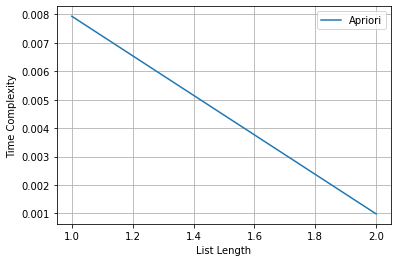

In [51]:
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements, times, label ='Apriori')
plt.grid()
plt.legend()
plt.show()

In [119]:
import itertools
import time

#take input of file name and minimum support count
print("Enter the filename:")
filename = "/content/data.txt"
print("Enter the minimum support count:")
min_support = int(input())

#read data from txt file
with open(filename) as f:
    content = f.readlines()

content = [x.strip() for x in content]

Transaction = []                  #to store transaction
Frequent_items_value = {}         #to store all frequent item sets

#to fill values in transaction from txt file
for i in range(0,len(content)):
    Transaction.append(content[i].split())

#function to get frequent one itemset
def frequent_one_item(Transaction,min_support):
    candidate1 = {}

    for i in range(0,len(Transaction)):
        for j in range(0,len(Transaction[i])):
            if Transaction[i][j] not in candidate1:
                candidate1[Transaction[i][j]] = 1
            else:
                candidate1[Transaction[i][j]] += 1

    frequentitem1 = []                      #to get frequent 1 itemsets with minimum support count
    for value in candidate1:
        if candidate1[value] >= min_support:
            frequentitem1 = frequentitem1 + [[value]]
            Frequent_items_value[tuple(value)] = candidate1[value]

    return frequentitem1

values = frequent_one_item(Transaction,min_support)
print(values)
print(Frequent_items_value)


# to remove infrequent 1 itemsets from transaction
Transaction1 = []
for i in range(0,len(Transaction)):
    list_val = []
    for j in range(0,len(Transaction[i])):
        if [Transaction[i][j]] in values:
            list_val.append(Transaction[i][j])
    Transaction1.append(list_val)



Enter the filename:
Enter the minimum support count:
1
[['12'], ['33'], ['55'], ['66'], ['22']]
{('1', '2'): 4, ('3', '3'): 3, ('5', '5'): 2, ('6', '6'): 2, ('2', '2'): 1}


In [120]:
def generate_k_subsets(dataset, length):
    subsets = []
    for itemset in dataset:
        subsets.extend(map(list, itertools.combinations(itemset, length)))
    return subsets

def subset_generation(ck_data,l):
    return map(list,set(itertools.combinations(ck_data,l)))

#apriori generate function to generate ck
def apriori_generate(dataset,k):
    ck = []
    #join step
    lenlk = len(dataset)
    for i in range(lenlk):
        for j in range(i+1,lenlk):
            L1 = list(dataset[i])[:k - 2]
            L2 = list(dataset[j])[:k - 2]
            if L1 == L2:
                ck.append(sorted(list(set(dataset[i]) | set(dataset[j]))))

    #prune step
    final_ck = []
    for candidate in ck:
        all_subsets = list(subset_generation(set(candidate), k - 1))
        found = True
        for i in range(len(all_subsets)):
            value = list(sorted(all_subsets[i]))
            if value not in dataset:
                found = False
        if found == True:
            final_ck.append(candidate)

    return ck,final_ck

def generateL(ck,min_support):
    support_ck = {}
    for val in Transaction1:
        for val1 in ck:
            value = set(val)
            value1 = set(val1)

            if value1.issubset(value):
                if tuple(val1) not in support_ck:
                    support_ck[tuple(val1)] = 1
                else:
                    support_ck[tuple(val1)] += 1
    frequent_item = []
    for item_set in support_ck:
        if support_ck[item_set] >= min_support:
            frequent_item.append(sorted(list(item_set)))
            Frequent_items_value[item_set] = support_ck[item_set]

    return frequent_item


In [125]:
def apriori(L1,min_support):
    k = 2;
    L = []
    L.append(0)
    L.append(L1)
    print("enter max_leaf_count")              #maximum number of items in bucket i.e. bucket capacity of each node
    max_leaf_count = int(input())
    print("enter max_child_count")             #maximum number of child you want for a node
    max_child_count = int(input())

    start = time.time()
    while(k<4):
        ck,final_ck = apriori_generate(L[k-1],k)                 #to generate candidate itemsets
        print("C%d" %(k))
        print(final_ck)
       # h_tree = generate_hash_tree(ck,max_leaf_count,max_child_count)       #to generate hashtree
        if (k > 2):
            while(len(L[k-1])>0):
                l = generateL(final_ck, min_support)
                L.append(l)
                print("Frequent %d item" % (k))
                print(l)
                k = k + 1
                ck, final_ck = apriori_generate(L[k - 1], k)
                print("C%d" % (k))
                print(final_ck)
            break
        k_subsets = generate_k_subsets(Transaction1,k) 
        print("K subsets:", k_subsets)              #to generate subsets of each transaction
        #for subset in k_subsets:
            #h_tree.add_support(subset)                                  #to add support count to itemsets in hashtree
        #lk = []
       # h_tree.get_frequent_itemsets(h_tree.root,min_support,lk)                  #to get frequent itemsets
        #print("Frequent %d item" %(k))
        #print(lk)
      #  L.append(lk)
        k = k + 1
    end = time.time()
    return L,(end-start)

L_value,time_taken = apriori(values,min_support)
print("Time Taken is:")
print(time_taken)
#print("final L_value")
#print(L_value)
print("All frequent itemsets with their support count:")
print(Frequent_items_value)

enter max_leaf_count
1
1
enter max_child_count
C2
[['12', '33'], ['12', '55'], ['12', '66'], ['12', '22'], ['33', '55'], ['33', '66'], ['22', '33'], ['55', '66'], ['22', '55'], ['22', '66']]
K subsets: [['12', '33'], ['12', '55'], ['33', '55'], ['12', '55'], ['12', '33'], ['12', '66'], ['33', '66'], ['12', '22'], ['12', '33'], ['12', '66'], ['22', '33'], ['22', '66'], ['33', '66']]


IndexError: ignored